# Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Imported few libarares that will help to perform some basics tasks like EDA, Data preprocessing.  

In [2]:
fraud = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


We have imported the dataset and sotre it in variable fraud. We can see that we have to detect the fraud. So, fraud is out target variable. We can see there are two values in fraud yes or no, which become this a classification problem. 

In [3]:
fraud.shape

(1000, 40)

We can see that our dataset is having 1000 Rows and 40 Columns. 

In [4]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can check that we don't have null values in any columns. However, column _c39  doesn't comntain any infromation so we can drop this column from the dataset. 

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

ABove is the detailed informaiton of our dataset. We can see that we have all the columns with 1000 non null information except _c39 which is having 1000 null values. We have columns in object, int anf float datatype.  

In [7]:
col = fraud.columns

In [8]:
for i in col:
    if fraud[i].dtype == 'int64':
        print("The datatype of",i,"is integer")
    else:
        print("The datatype of",i,"is Object")

The datatype of months_as_customer is integer
The datatype of age is integer
The datatype of policy_number is integer
The datatype of policy_bind_date is Object
The datatype of policy_state is Object
The datatype of policy_csl is Object
The datatype of policy_deductable is integer
The datatype of policy_annual_premium is Object
The datatype of umbrella_limit is integer
The datatype of insured_zip is integer
The datatype of insured_sex is Object
The datatype of insured_education_level is Object
The datatype of insured_occupation is Object
The datatype of insured_hobbies is Object
The datatype of insured_relationship is Object
The datatype of capital-gains is integer
The datatype of capital-loss is integer
The datatype of incident_date is Object
The datatype of incident_type is Object
The datatype of collision_type is Object
The datatype of incident_severity is Object
The datatype of authorities_contacted is Object
The datatype of incident_state is Object
The datatype of incident_city is

In [9]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Above we have used a for loop to print the datatype of the columns. ALso, we check the same using dtypes. 

In [10]:
fraud.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,05-08-1992,OH,250/500,NaN,NaN,NaN,NaN,...,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


Above is the mathematical information of our datset. The above information shows the mean, median, std deviation, quartile and other details of our dataset.  

In [11]:
col = fraud.columns
col

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Above is the list of all the columns that we have in our datset. 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

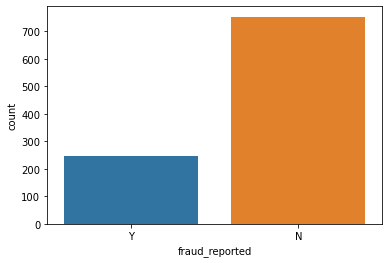

In [12]:
sns.countplot(fraud['fraud_reported'])

Above is the countplot of target column that fraud_reported. The plot shows that there are two values Yes and No. Most of columns are having value No means fraud not detected. Also, we can see that classes are not balanced here. 

In [13]:
fraud['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Here we can see that there are 753 values for No and 247 for yes

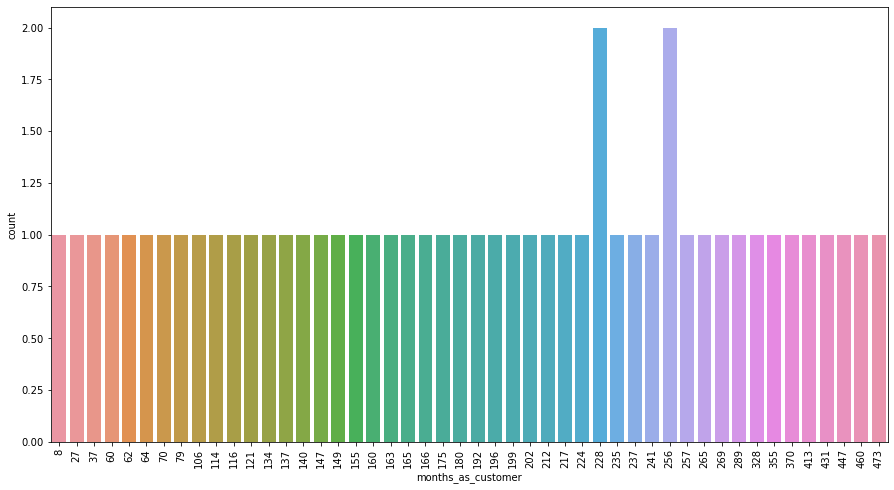

In [14]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(fraud['months_as_customer'].head(50))
plt.show()

The above grapf shows that how long the customer is associated with the insurance company. X-asix shows the months and y-axis shows the count of customer in that particular month. Used 50 entries for graphical representation which shoews that we have maximum count from the 228 and and 256 months old customer.  

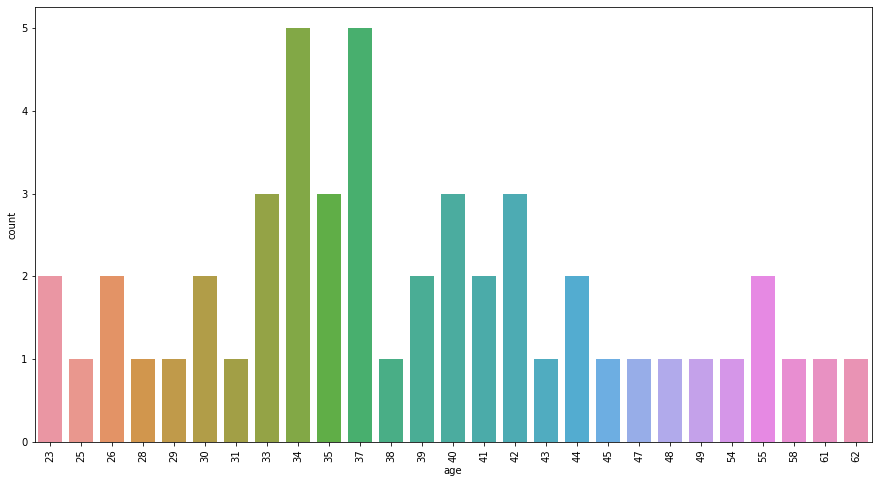

In [15]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(fraud['age'].head(50))
plt.show()

Above we can see that we have maximum count from 34 and 37 age. WHich means that this age group is highest to take insurance. 

In [16]:
col

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

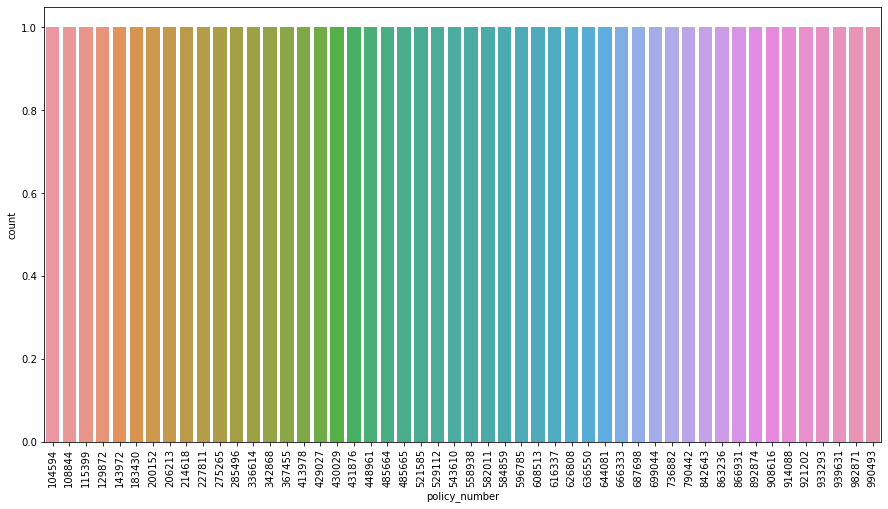

In [17]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(fraud['policy_number'].head(50))
plt.show()

The abve graph shows count 1 which means that every customer is given a unique policy number, which each customer is having wethre their claim is fraud or not. 

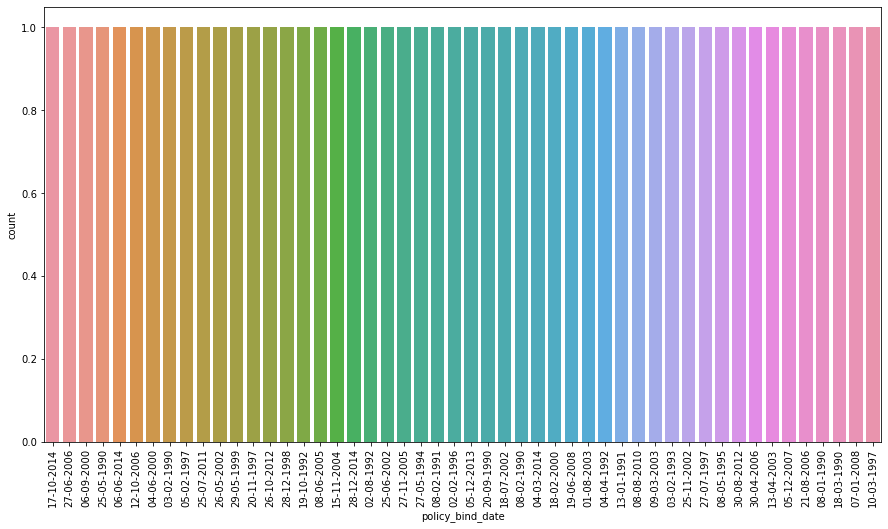

In [18]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(fraud['policy_bind_date'].head(50))
plt.show()

We can see the dates on which the customer insured their vehicle. The age is seems unique as every age is having count 1. 

In [19]:
col

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

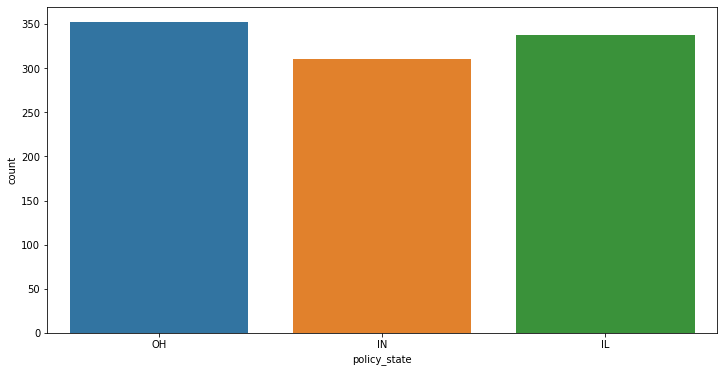

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(fraud['policy_state'])
plt.show()

ANother categorical column shows that maximum count is from OH, then IL and last IN. This means that maximum customers are from OH then from IL and them from IN

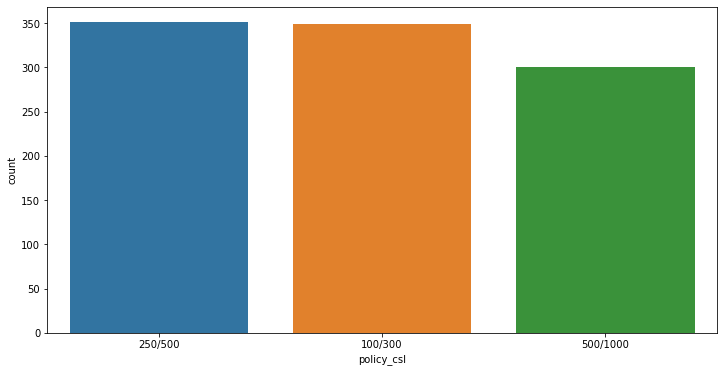

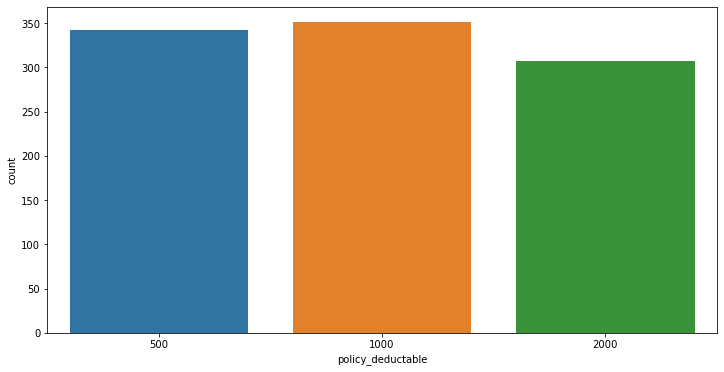

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(fraud['policy_csl'])
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(fraud['policy_deductable'])
plt.show()

The abive 2 graphs shows the count of policy_csl and policy_deductable in the dataset. 

In [ ]:
'', 'policy_deductable',
       '', 'umbrella_limit', 'insured_zip', '',
       'insured_education_level',
plt.figure(figsize=(12,6))
sns.countplot(fraud['insured_sex'])
plt.show()
        
    , '', '',
       '', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'
    
plt.figure(figsize=(12,6))
sns.countplot(fraud['insured_occupation'])
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(fraud['insured_hobbies'])
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(fraud['insured_relationship'])
plt.show()

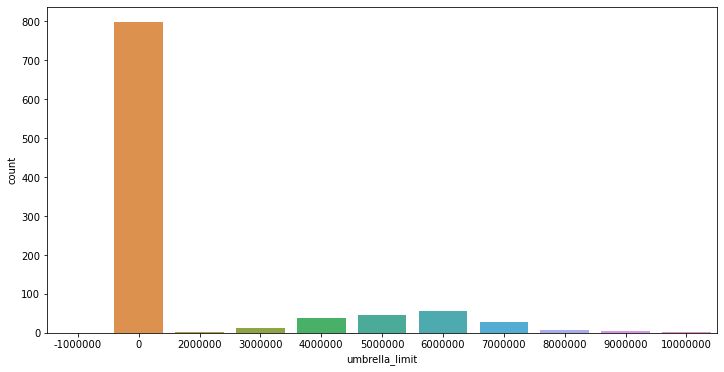

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(fraud['umbrella_limit'])
plt.show()

Here we can say that we have approx 800 person who don't have any umbrella limit on their insurance. we have max approx 7 in the range 60,00,000

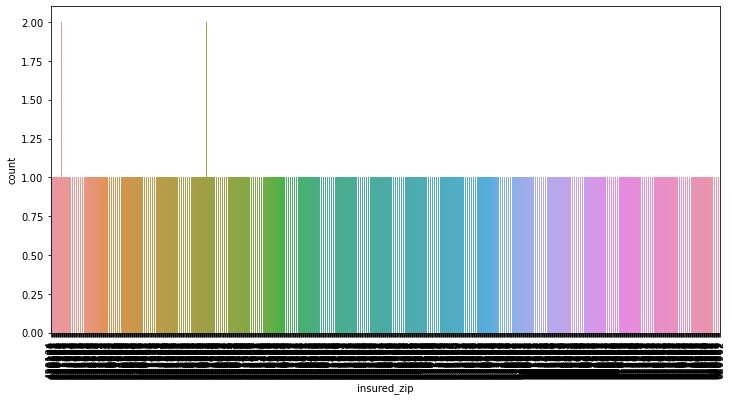

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['insured_zip'])
plt.show()

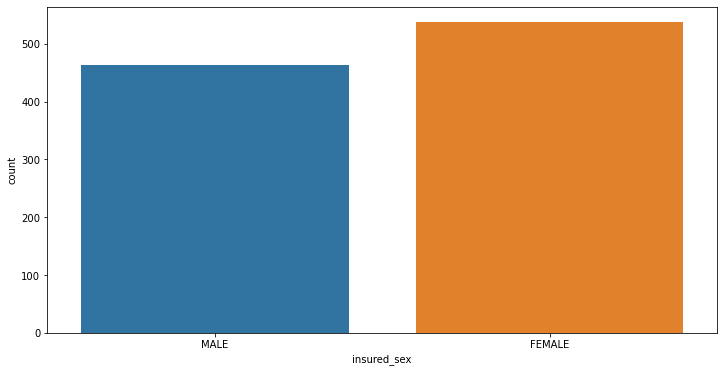

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(fraud['insured_sex'])
plt.show()

Above columns shows that count of insured females is more than that of males. 

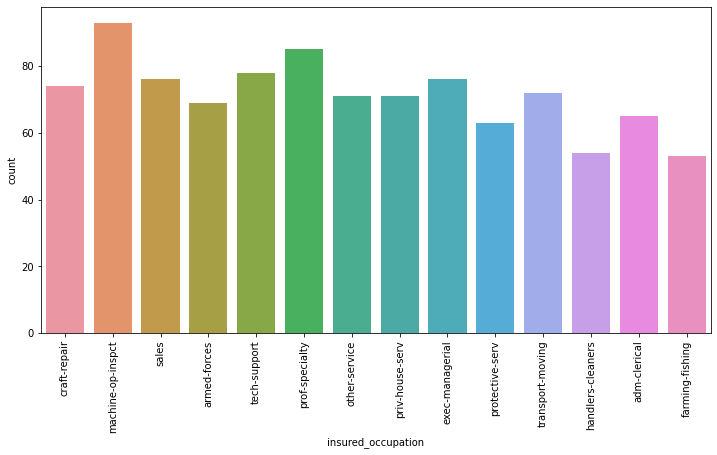

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['insured_occupation'])
plt.show()


We can say that most of the insured are from the machine op ispct section. 

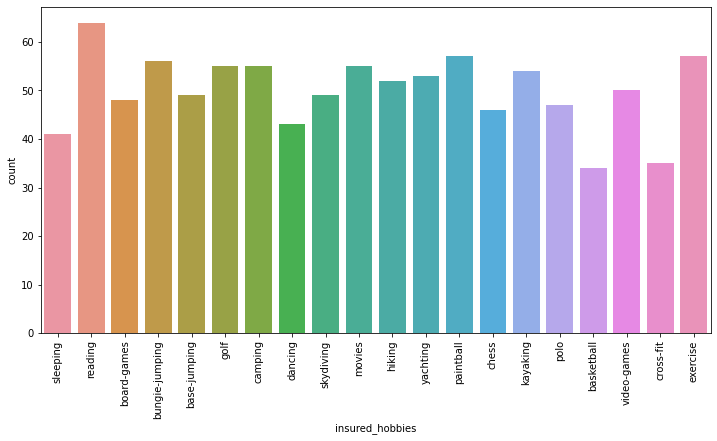

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['insured_hobbies'])
plt.show()


Most of the insured love to read 

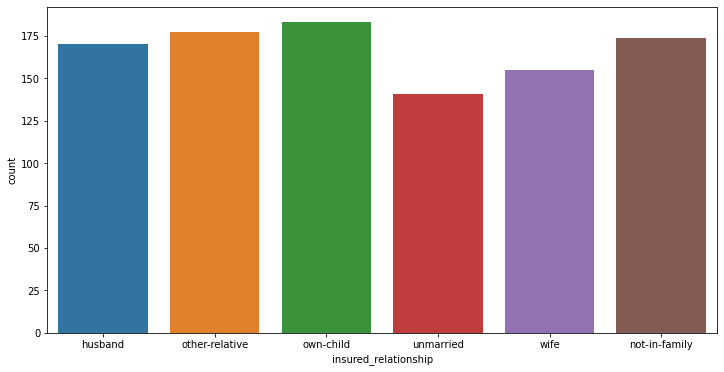

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(fraud['insured_relationship'])
plt.show()

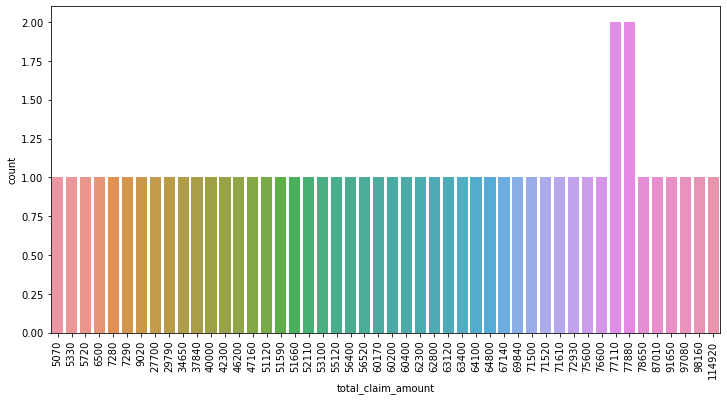

In [44]:

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['total_claim_amount'].head(50))
plt.show()

We can check the maximum count is for 77110 and 77880 in top fifty entries. This shows the count of claim amount. 

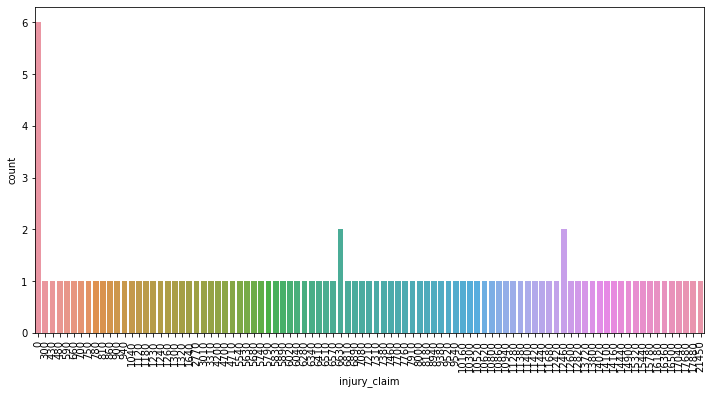

In [48]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['injury_claim'].head(100))
plt.show()  

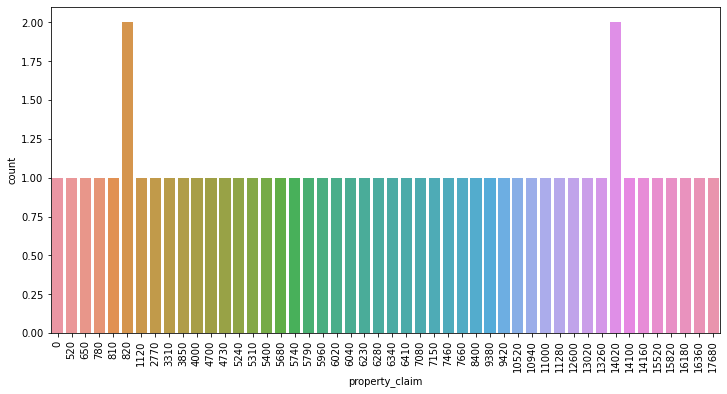

In [41]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['property_claim'].head(50))
plt.show()  

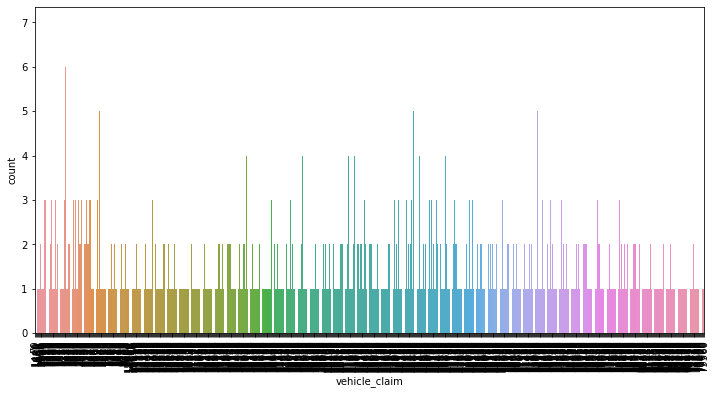

In [42]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['vehicle_claim'])
plt.show()

Above graph shows the vehicle claim counts in dataset

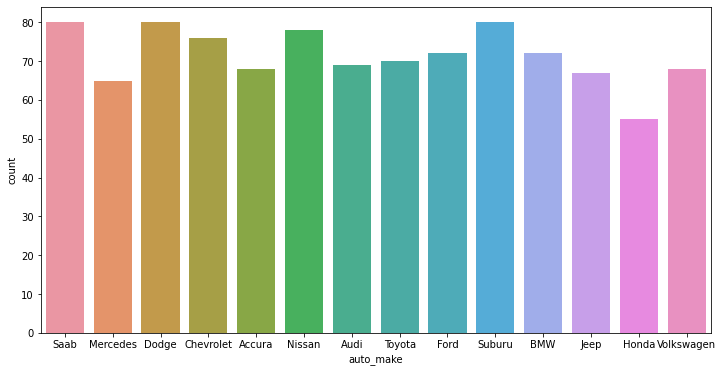

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(fraud['auto_make'])
plt.show() 

Here we can see the the make of the automobiles that customer is usig. 

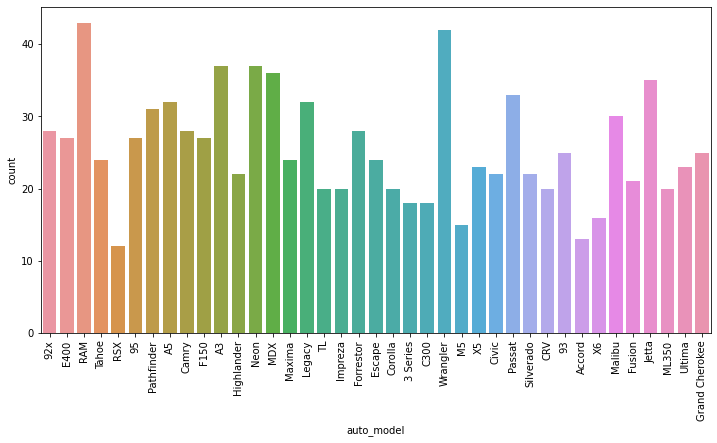

In [43]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(fraud['auto_model'])
plt.show() 

These are the type of model customer using and we can check that maximum are using RAM, Wrangler. 

In [49]:
col

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

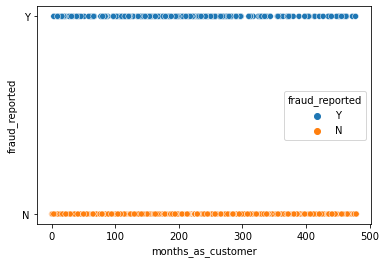

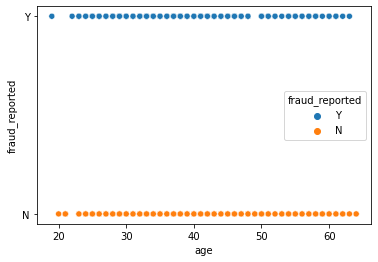

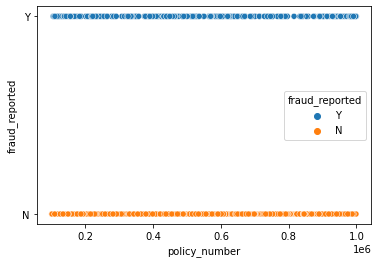

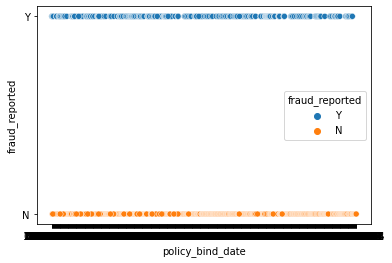

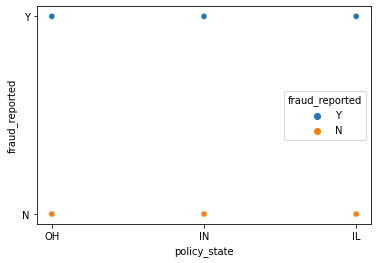

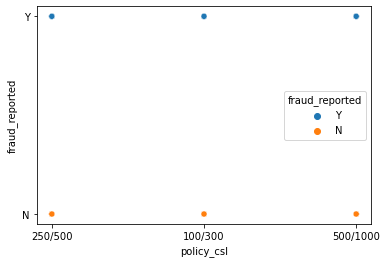

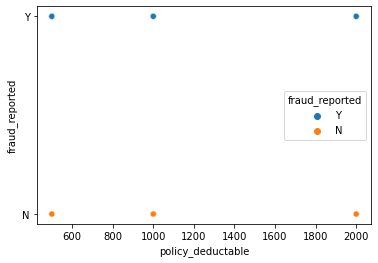

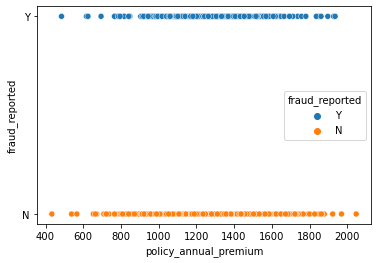

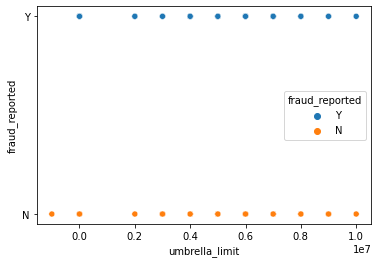

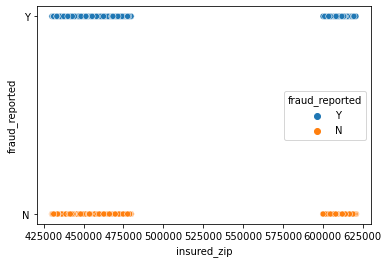

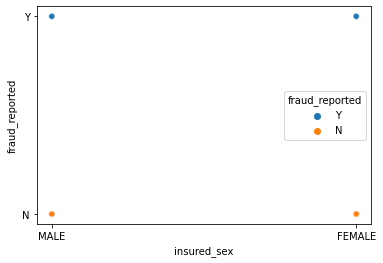

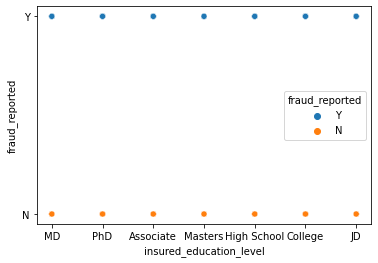

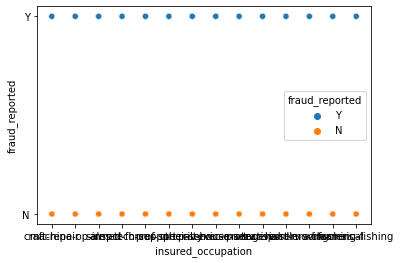

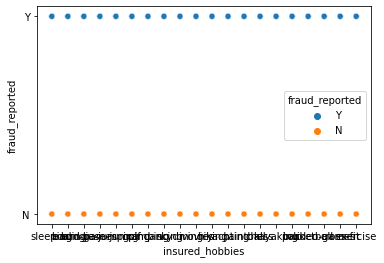

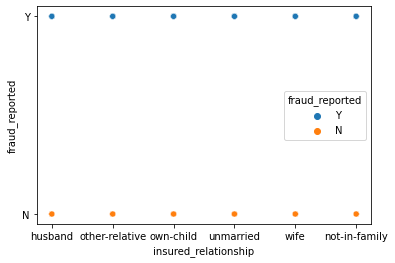

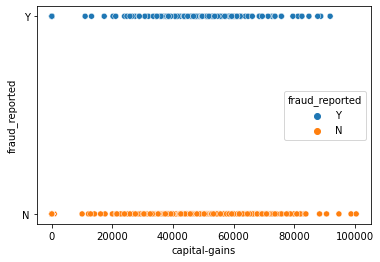

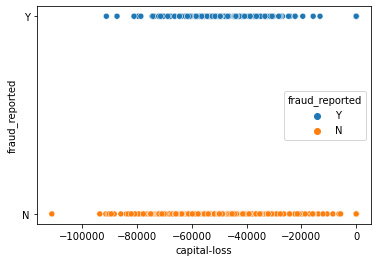

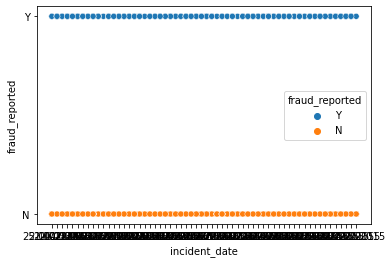

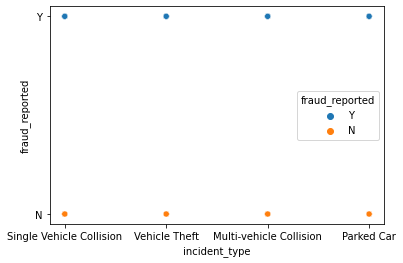

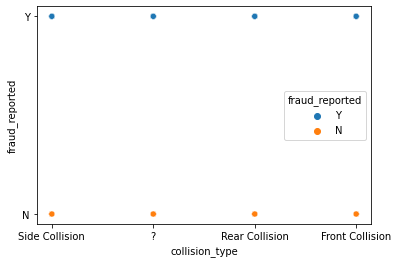

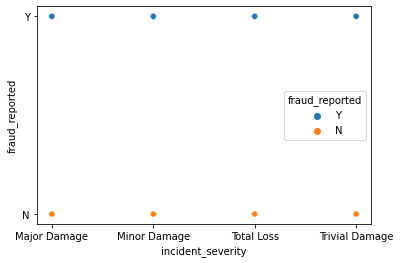

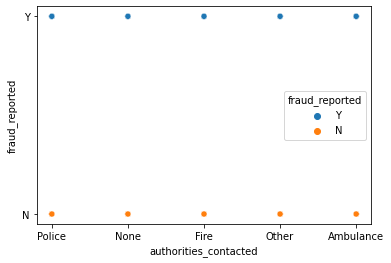

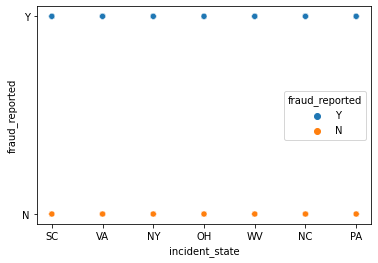

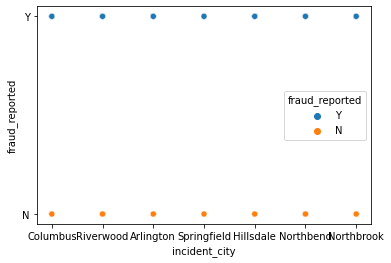

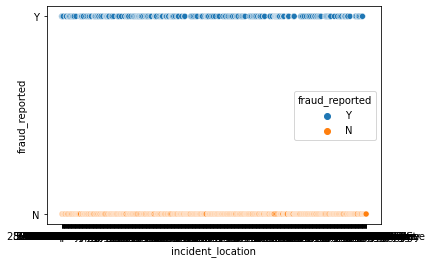

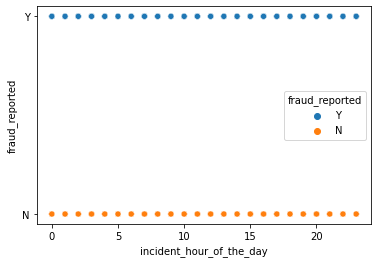

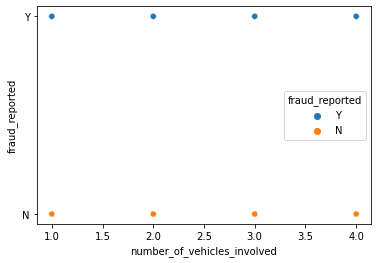

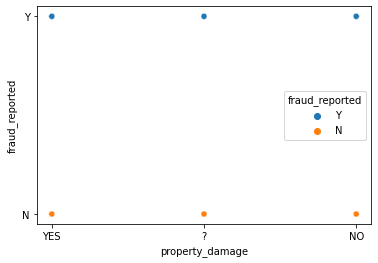

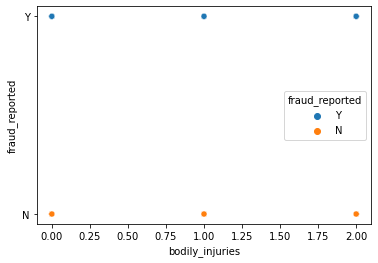

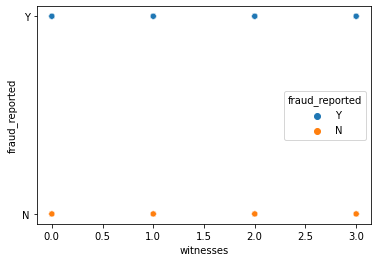

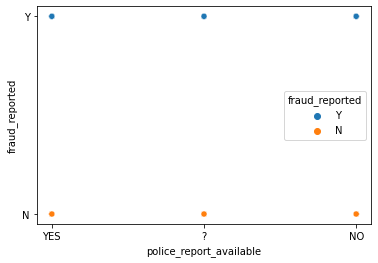

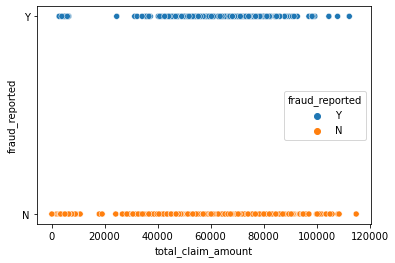

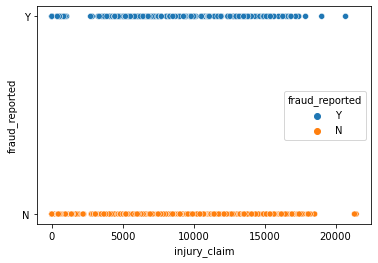

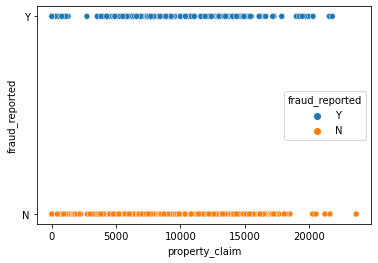

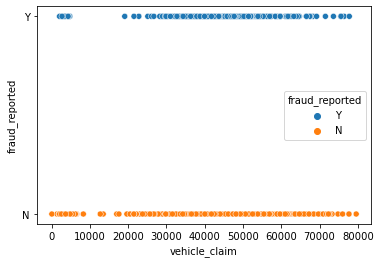

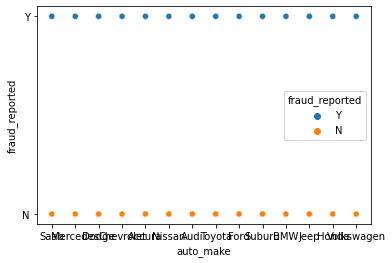

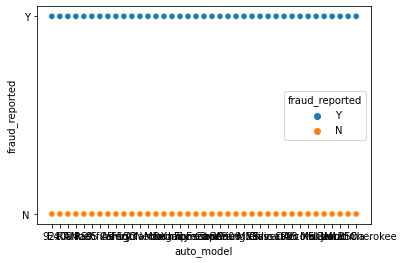

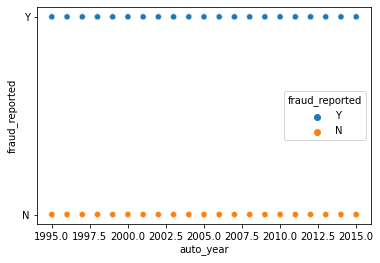

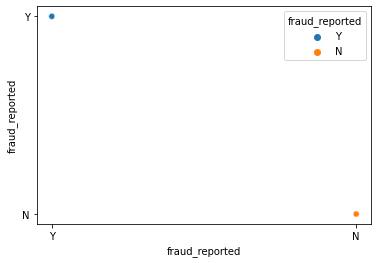

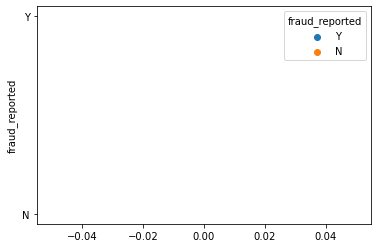

In [50]:
for i in col:
    sns.scatterplot(x = i , y = 'fraud_reported' , data = fraud, hue='fraud_reported')
    plt.show()

The above scatter plots shows scattering of data in variuos column when compared to label. 

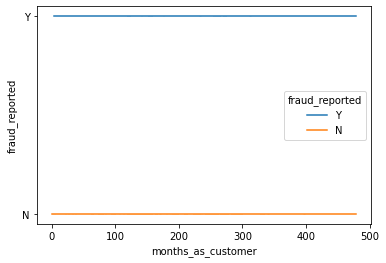

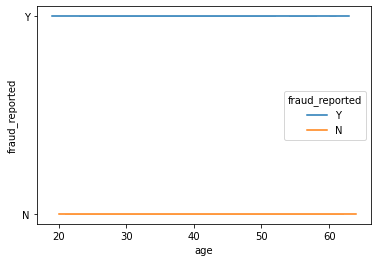

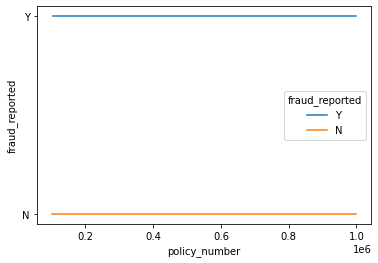

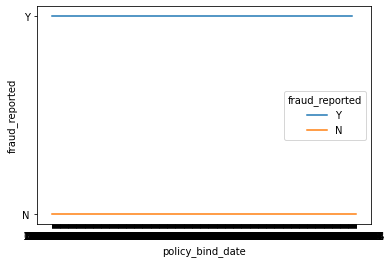

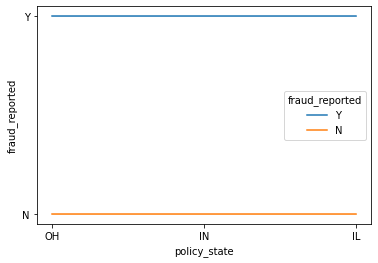

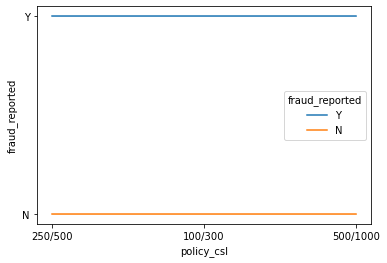

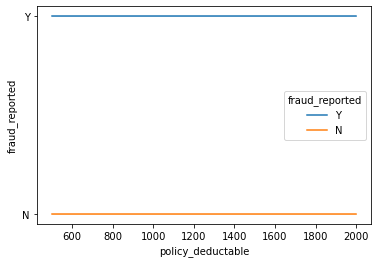

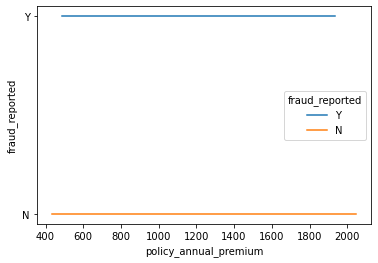

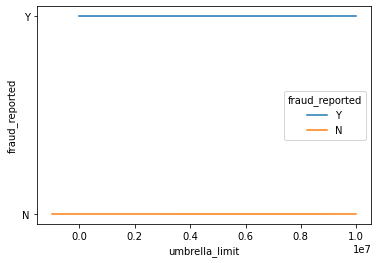

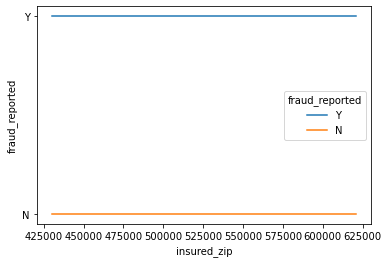

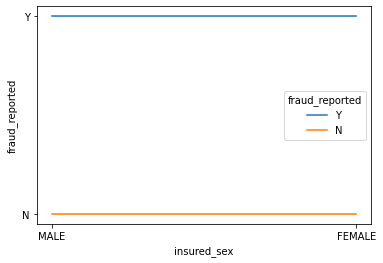

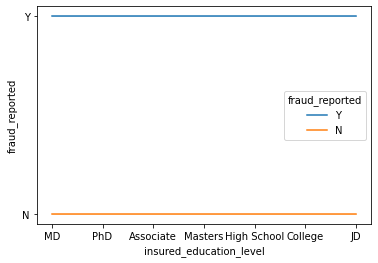

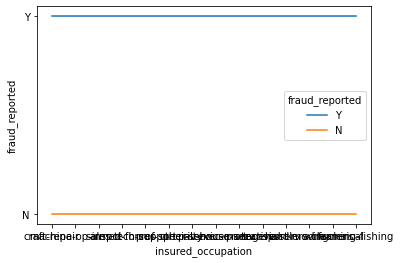

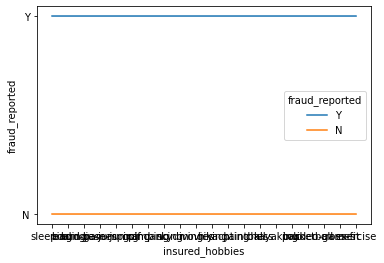

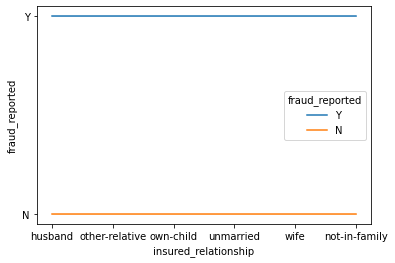

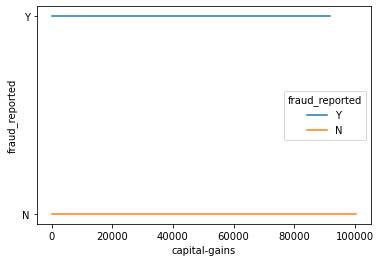

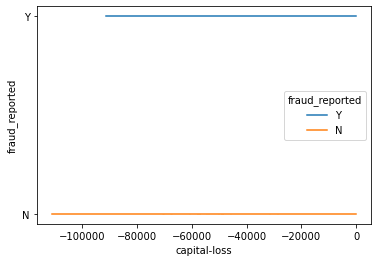

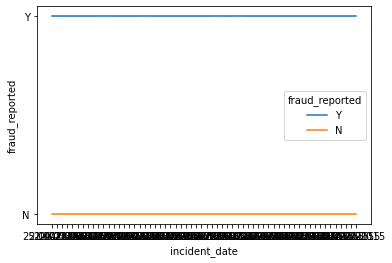

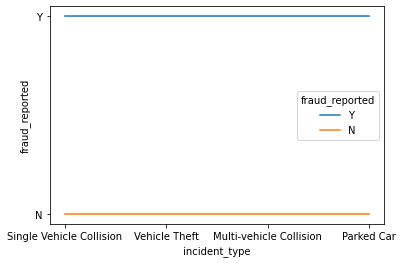

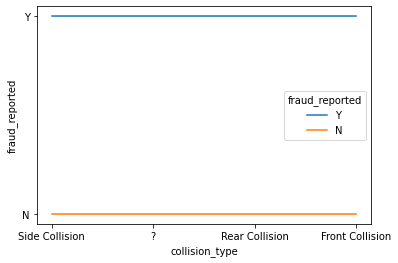

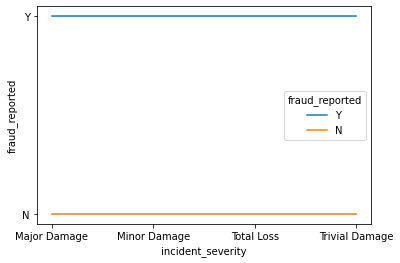

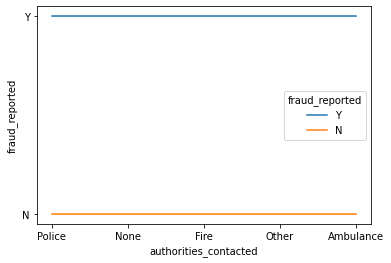

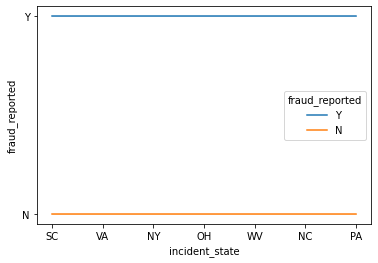

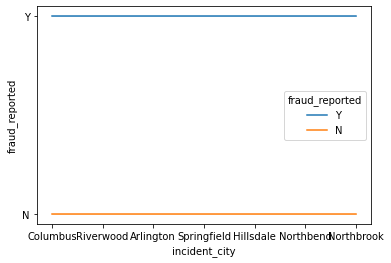

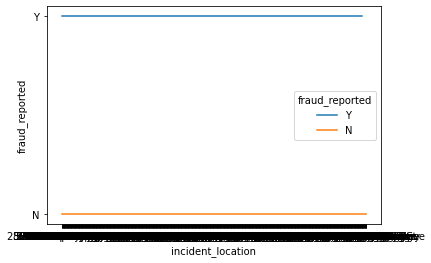

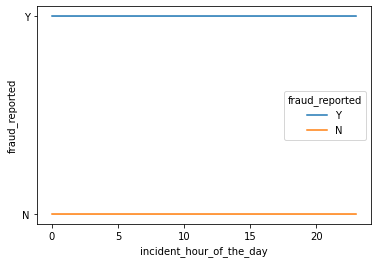

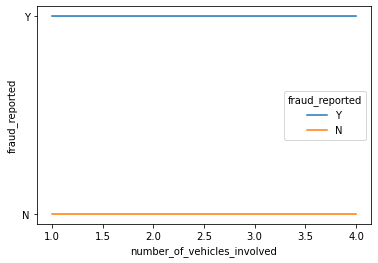

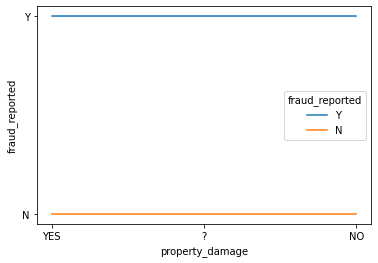

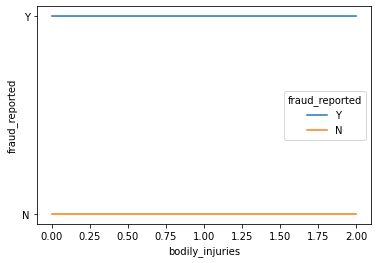

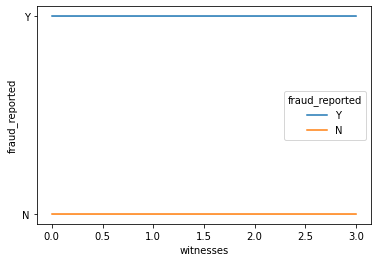

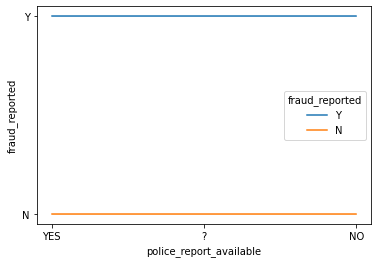

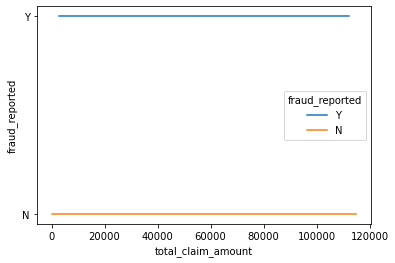

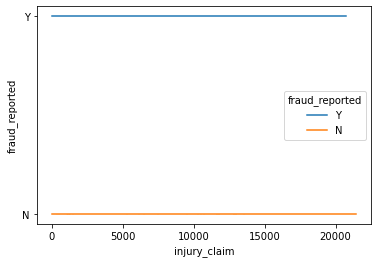

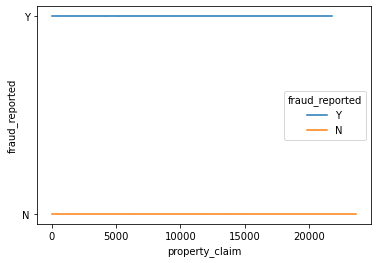

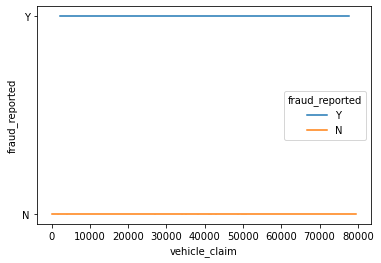

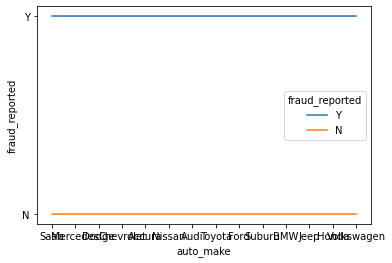

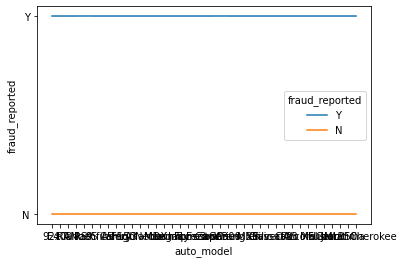

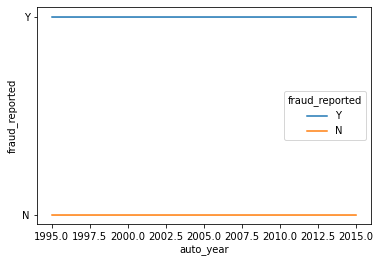

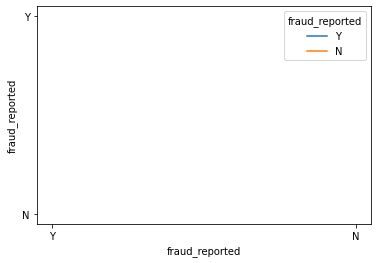

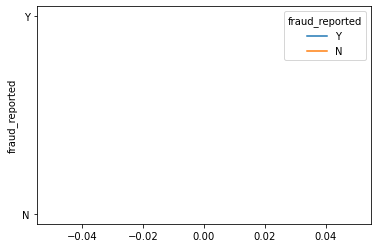

In [51]:
for i in col:
    sns.lineplot(x=i , y = 'fraud_reported' , data = fraud, hue='fraud_reported')
    plt.show()

In [53]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We don't have any null values in the dataset. 

In [57]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We can see that we are having some columns with object datatype. 

In [59]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

As our dataset is having object datatype we have imported label encoder from sklearn and we will convert the object to int or float dataype using encoder. 

In [60]:
data= fraud.copy()

We have made a copy of our dataset and stored the same in data variable

In [61]:
col2 = data.columns
for i in col2:
    if data[i].dtypes == 'object':
        data[i] = label.fit_transform(data[i])

We have now converted all the object columns to int datatype

In [62]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

Here are the results for the above loop

months_as_customer                 AxesSubplot(0.125,0.71587;0.065678x0.16413)
age                             AxesSubplot(0.203814,0.71587;0.065678x0.16413)
policy_number                   AxesSubplot(0.282627,0.71587;0.065678x0.16413)
policy_deductable               AxesSubplot(0.361441,0.71587;0.065678x0.16413)
policy_annual_premium           AxesSubplot(0.440254,0.71587;0.065678x0.16413)
umbrella_limit                  AxesSubplot(0.519068,0.71587;0.065678x0.16413)
insured_zip                     AxesSubplot(0.597881,0.71587;0.065678x0.16413)
capital-gains                   AxesSubplot(0.676695,0.71587;0.065678x0.16413)
capital-loss                    AxesSubplot(0.755508,0.71587;0.065678x0.16413)
incident_hour_of_the_day        AxesSubplot(0.834322,0.71587;0.065678x0.16413)
number_of_vehicles_involved       AxesSubplot(0.125,0.518913;0.065678x0.16413)
bodily_injuries                AxesSubplot(0.203814,0.518913;0.065678x0.16413)
witnesses                      AxesSubplot(0.282627,

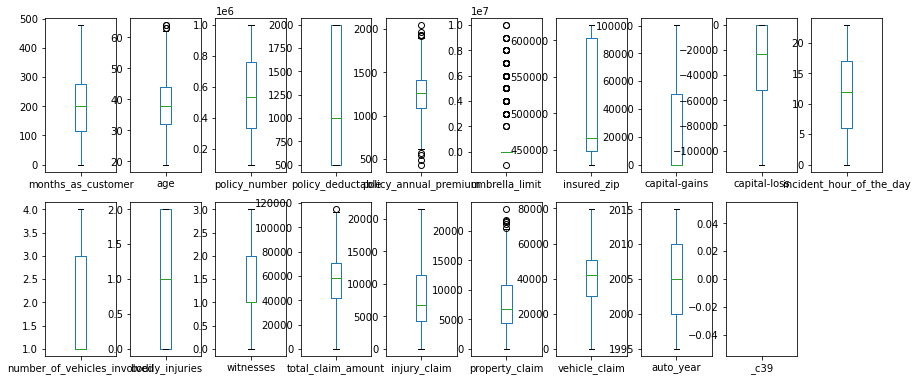

In [65]:
fraud.plot(kind='box', subplots=True, layout=(4,10), figsize = (15,13))

0.3621768477780205
months_as_customer
No skewness is present in months_as_customer


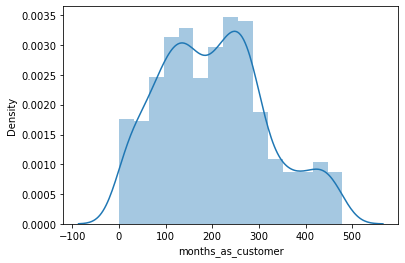

0.47898804709224163
age
No skewness is present in age


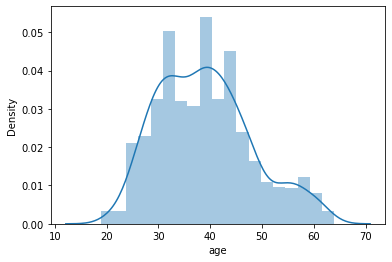

0.03899064217531216
policy_number
No skewness is present in policy_number


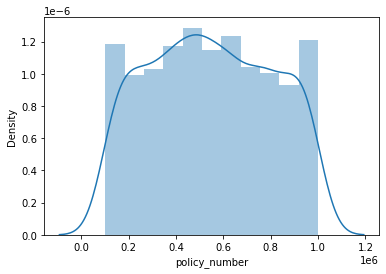

0.005193997088425996
policy_bind_date
No skewness is present in policy_bind_date


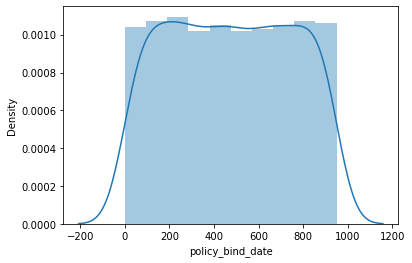

-0.026176785749321474
policy_state
No skewness is present in policy_state


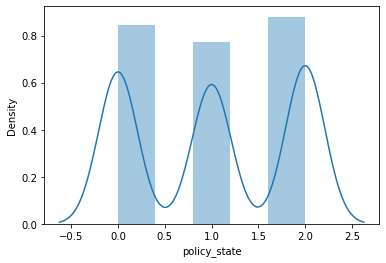

0.08892787567955927
policy_csl
No skewness is present in policy_csl


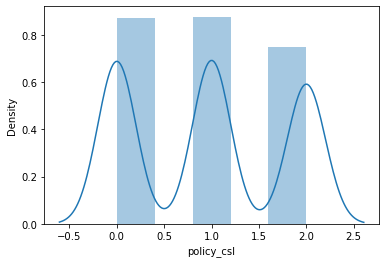

0.4778872137362794
policy_deductable
No skewness is present in policy_deductable


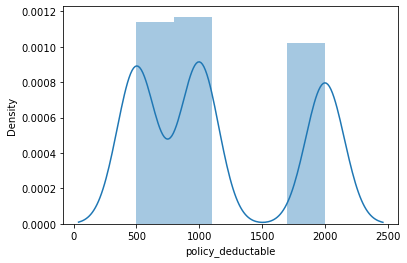

0.004401994526610823
policy_annual_premium
No skewness is present in policy_annual_premium


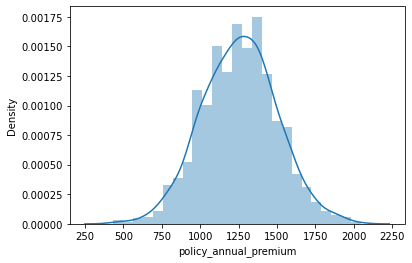

1.806712198714504
umbrella_limit
umbrella_limit Column is having skewness


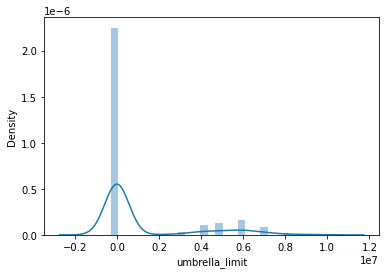

0.8165539258839357
insured_zip
insured_zip Column is having skewness


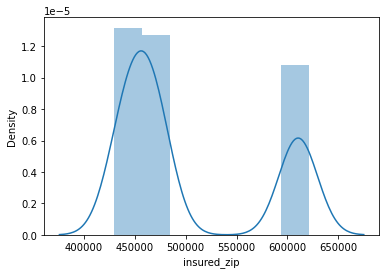

0.1486299337454921
insured_sex
No skewness is present in insured_sex


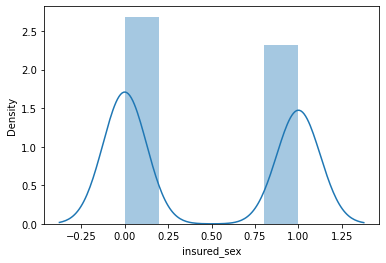

-0.00014786773180951816
insured_education_level
No skewness is present in insured_education_level


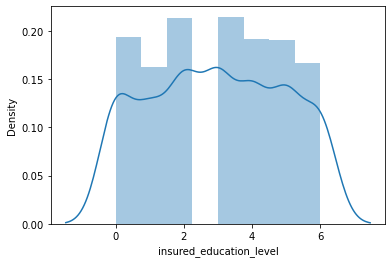

-0.05888118256012689
insured_occupation
No skewness is present in insured_occupation


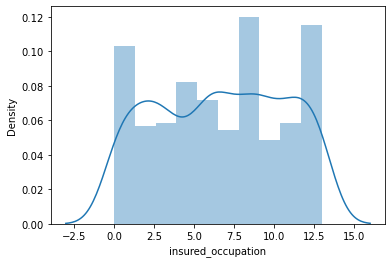

-0.06156286537865081
insured_hobbies
No skewness is present in insured_hobbies


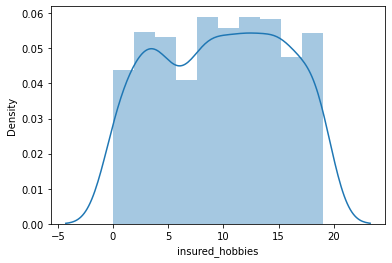

0.07748806298696863
insured_relationship
No skewness is present in insured_relationship


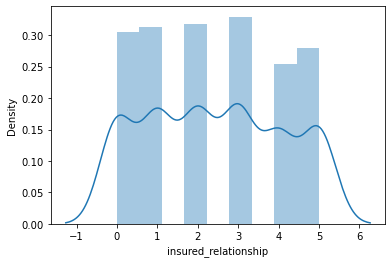

0.4788502295807907
capital-gains
No skewness is present in capital-gains


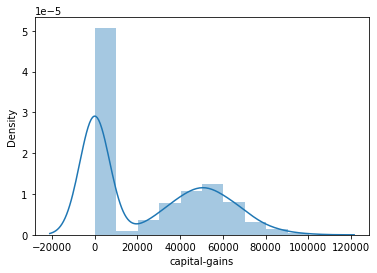

-0.39147194299389343
capital-loss
No skewness is present in capital-loss


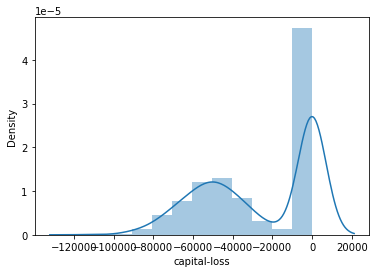

0.004756439984926126
incident_date
No skewness is present in incident_date


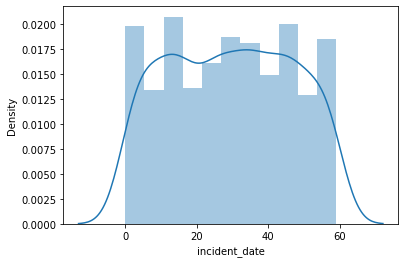

0.10150702784542807
incident_type
No skewness is present in incident_type


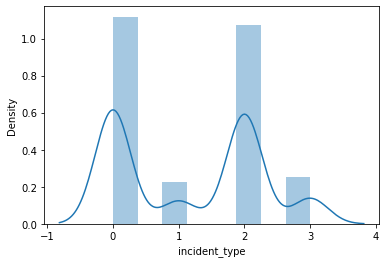

-0.1933449732173423
collision_type
No skewness is present in collision_type


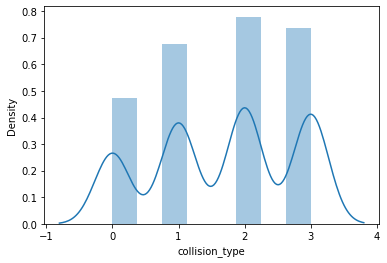

0.2790163147307228
incident_severity
No skewness is present in incident_severity


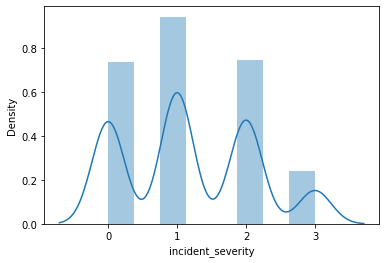

-0.12174443595071342
authorities_contacted
No skewness is present in authorities_contacted


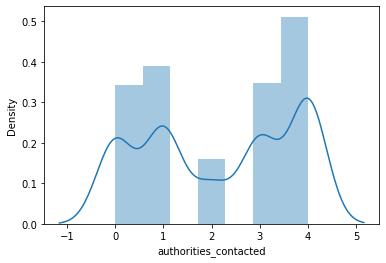

-0.14886535439152856
incident_state
No skewness is present in incident_state


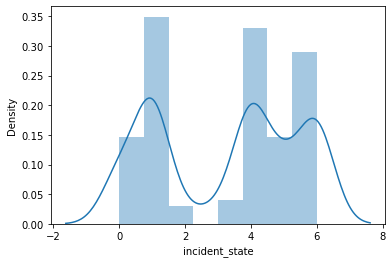

0.04953064228269671
incident_city
No skewness is present in incident_city


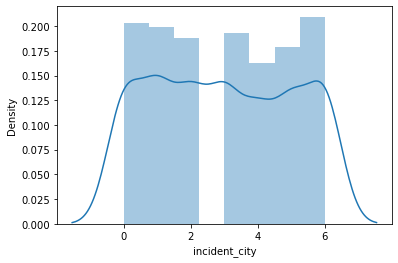

0.0
incident_location
No skewness is present in incident_location


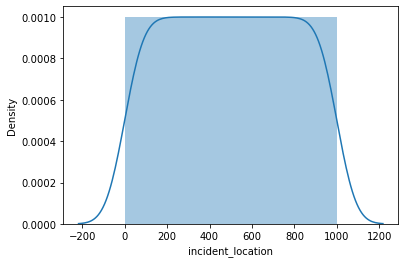

-0.03558446643823673
incident_hour_of_the_day
No skewness is present in incident_hour_of_the_day


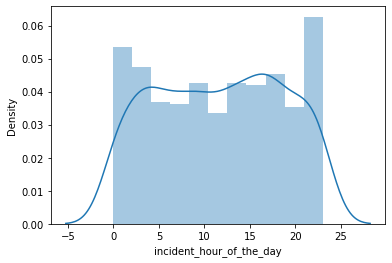

0.502664087487584
number_of_vehicles_involved
No skewness is present in number_of_vehicles_involved


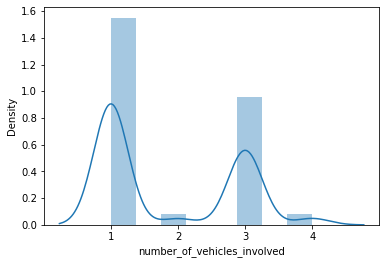

0.10641805966850999
property_damage
No skewness is present in property_damage


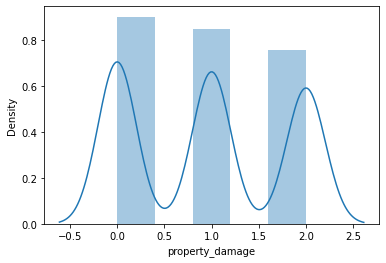

0.014777103511243209
bodily_injuries
No skewness is present in bodily_injuries


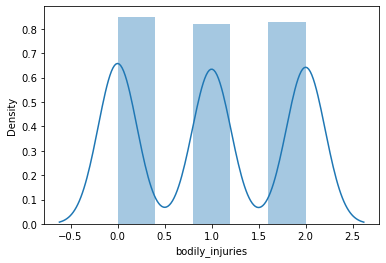

0.019636419856529662
witnesses
No skewness is present in witnesses


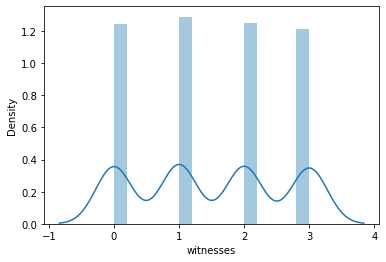

0.05296669114251888
police_report_available
No skewness is present in police_report_available


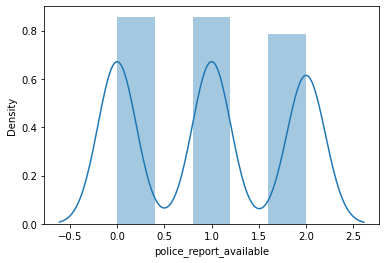

-0.594581988510234
total_claim_amount
total_claim_amount Column is having skewness


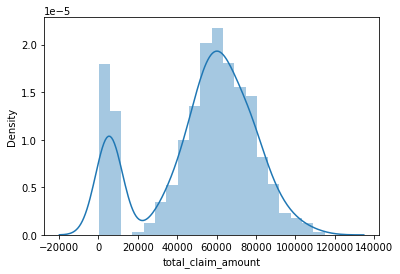

0.26481087847181833
injury_claim
No skewness is present in injury_claim


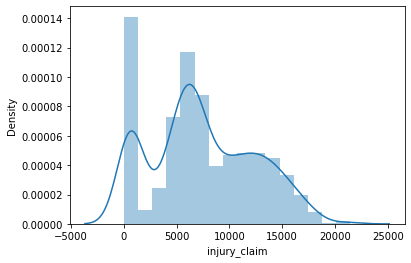

0.3781687764308289
property_claim
No skewness is present in property_claim


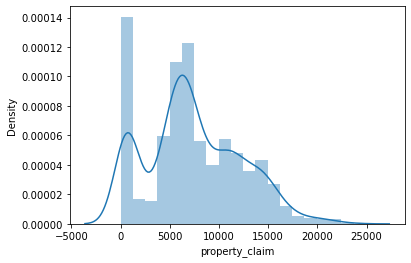

-0.6210979312228687
vehicle_claim
vehicle_claim Column is having skewness


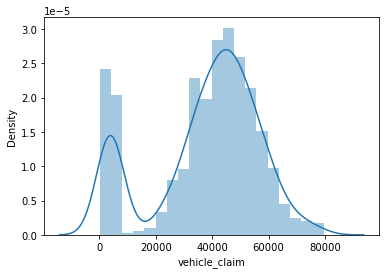

-0.01879656780534966
auto_make
No skewness is present in auto_make


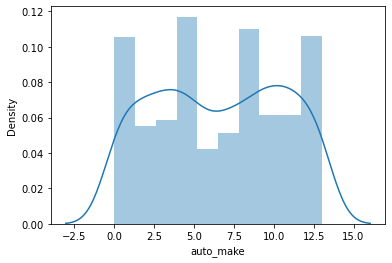

-0.08077254400717898
auto_model
No skewness is present in auto_model


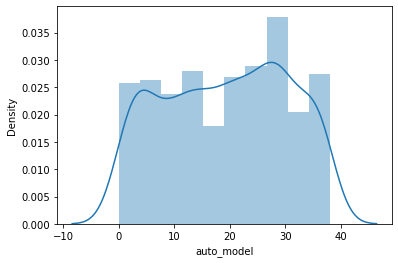

-0.04828880711387396
auto_year
No skewness is present in auto_year


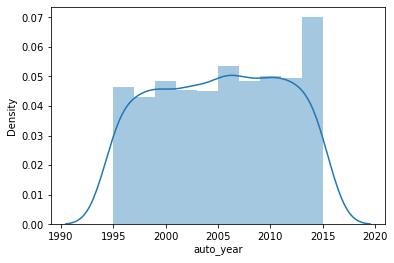

1.175051104189318
fraud_reported
fraud_reported Column is having skewness


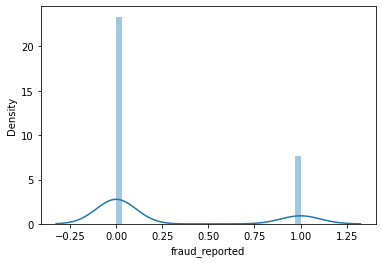

nan
_c39
No skewness is present in _c39


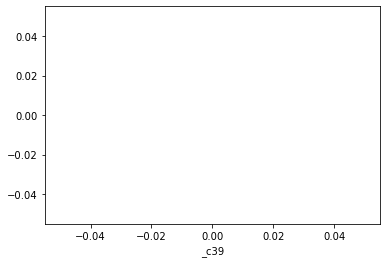

In [69]:
for i in col2:
    if (data[i].skew() > 0.55 or data[i].skew() < -0.55): 
        print(data[i].skew())
        print(i)
        print(i,"Column is having skewness")
    else:
        print(data[i].skew())
        print(i)
        print("No skewness is present in",i)
    
    plt.figure()
    sns.distplot(data[i])
    plt.show()

Above we plotted the distribution plot that shows the distribution of the data in each column. We are plotting this to check wethre the column is skewed or not. I have printed the result with the column name and skewness above. We can see few columns are skewed. 

<function matplotlib.pyplot.show(close=None, block=None)>

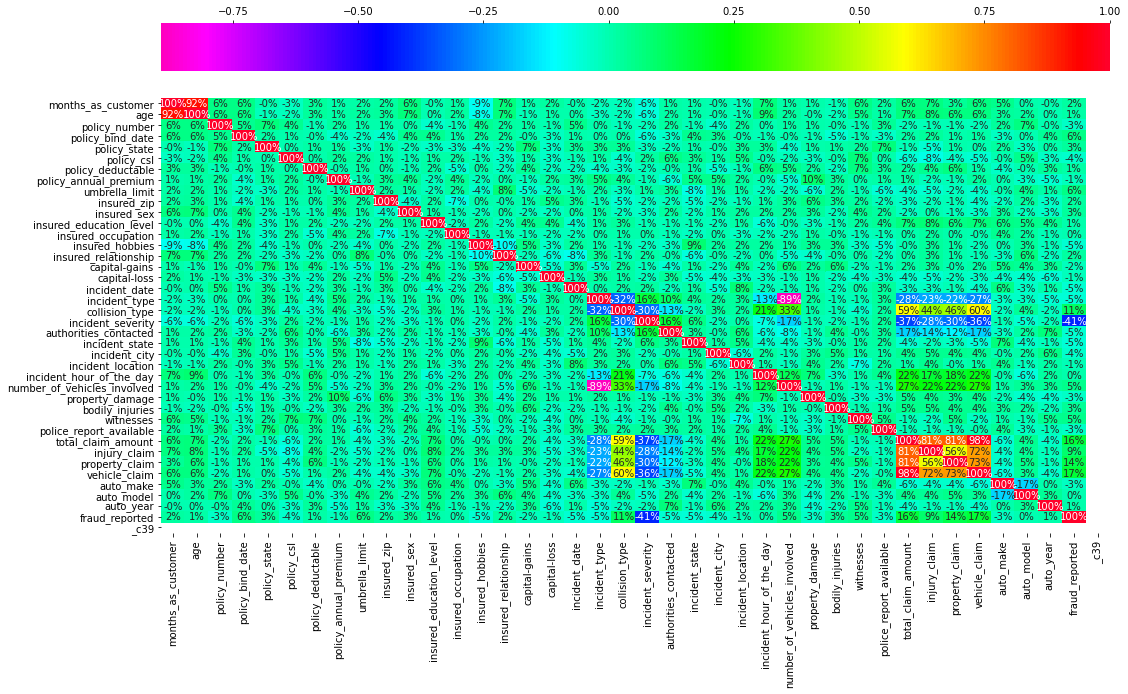

In [75]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

ABove is the heatmap of corelation among the datset. We can check that there few columns are highly collinear with different columns. We can check that:
1. month as customer and age are highly corelated. 
2. incident location and incident hour are corelated with total claim amount, injury claim,property claim, vehicle claim.
3. total claim amount, injury claim,property claim, vehicle claim are highly corelated with each other. 
4. fraud detected is having good corelation with total claim amount, injury claim,property claim, vehicle claim,least corelated with incident severity. Also, having soime corelation with columns as well but %age doesn't looks good. 
5. ALso we can check that _c39 have no values hence dropping the columns

From the above graph we can say that our datset is havung multicolinerity. 

In [79]:
data = data.drop("_c39",axis = 1)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

We have called variance inflation factor from sklearn otliers influence which shows how much a variable is influenced by another variable in the dataset. We then ceated a function that will take a input x and give us vif as result. 

In [81]:
calc_vif(data)

,Variables,VIF Factor
0,months_as_customer,28.327588
1,age,131.477183
2,policy_number,5.702211
3,policy_bind_date,4.089866
4,policy_state,2.587724
5,policy_csl,2.471942
6,policy_deductable,4.617097
7,policy_annual_premium,28.610871
8,umbrella_limit,1.272468
9,insured_zip,51.499648


ABove is the data frame showing multicolinearity among the columns in our dataset. We can drop these columns or can use PCS to minimize the columns which wil  help us to reduce the multicolinearity.

We can drop the columns, but will try to reduce them first and see the results. 

In [84]:
x = data.iloc[:,0:38]

In [85]:
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,31,2009


In [86]:
y = data['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

Dataset splitted into 2 variables where the x contains all gthe independant variables and Y contain the target variable

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x,y)

As we already know that our dataset is not balanced as the label are imbalanbced. So, balancing datset using SMOTE. 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

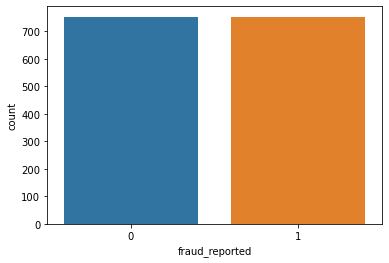

In [89]:
sns.countplot(y)

We can check that we have successfully balanced the classes and dataset. 

In [ ]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

Removing skewness using Yeo Johnson  method.

In [132]:
from sklearn.preprocessing import StandardScaler

We can check that out datset values are not equal hence calling standar scalre to scale the values of the datset. 

In [133]:
sc = StandardScaler()
x = sc.fit_transform(x)

We have saved the standar scaler to a variable and then used that variable to scale the independant variable. 

In [134]:
from sklearn.model_selection import train_test_split

We have called train test split to feed training and testing data to our ML model. 

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45)

We have splitted the data into trainig and testing part. Here we have splitted the data with a ratio of 70:30. 70% part will go for training and remaining 30% will go for the testing part. 

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

We are having two outputs (categorical output), so we called all the classification algorithms reuired to build a machine learning model for the classification problem.

In [137]:
log = LogisticRegression()
nv = GaussianNB()
support = SVC()
knear = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()

We have assigned a variable to the respective algorithms, which can be called to perform the acion done by an algorithms. 

In [138]:
def predict_model(X):
    X.fit(x_train,y_train)
    prediction = X.predict(x_test)
    print("Details for",X,"Model :-")
    print("The accuracy score for",X,"is:-",accuracy_score(y_test,prediction)*100,'\n')
    cm = confusion_matrix(y_test,prediction)
    print("The confusion matrix for",X,"is :- \n",cm,'\n')    
    print("The classification report for",X,"is:- \n",classification_report(y_test,prediction),'\n')
    
    from sklearn.model_selection import cross_val_score
    cv_score = cross_val_score(X,x,y,cv=5)
    print('\n')
    print("Cross Validation Score for",X,"is:- \n",cv_score)
    print("Mean of Cross Validation Score for",X,"is:- \n",cv_score.mean())
    print("Standard Deviation of Cross Validation Score for",X,"is:- \n",cv_score.std())
    print('\n')
    
    print(X,'Model Score',accuracy_score(y_test,prediction)*100)
    print('Mean Score After CV',)
    print("Model Score is", accuracy_score(y_test,prediction)-cv_score.mean())
    print('\n')
    
    print("Printing the AUC/RUC curve for the model")
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    y_predict_prob = X.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=X)
    plt.xlabel('False')
    plt.ylabel('True')
    plt.title(X)
    plt.show()

We created a function which will take the variable assigned to the algorithms and will fir the data to the algorithms and predict the data on the basis of the testing data and then show us the:-

1. accuracy score
2. confusion_matrix
3. classification_report, for the model. 

After that we called the Cross validation score from sklearn library which will calculate the cross validation score. We can evaluate and compare the algorithms using the same. 

Once done the function will print the AUC/ROC curve. 

Details for LogisticRegression() Model :-
The accuracy score for LogisticRegression() is:- 80.30973451327434 

The confusion matrix for LogisticRegression() is :- 
 [[188  51]
 [ 38 175]] 

The classification report for LogisticRegression() is:- 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       239
           1       0.77      0.82      0.80       213

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452
 



Cross Validation Score for LogisticRegression() is:- 
 [0.66225166 0.72425249 0.84053156 0.87707641 0.87375415]
Mean of Cross Validation Score for LogisticRegression() is:- 
 0.7955732547138676
Standard Deviation of Cross Validation Score for LogisticRegression() is:- 
 0.08676124346301115


LogisticRegression() Model Score 80.30973451327434
Mean Score After CV
Model Score is 0.007524090418875695


Printing the AUC/RU

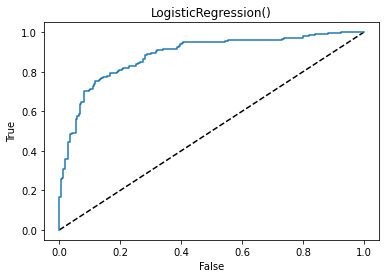

In [139]:
predict_model(log)

Details for GaussianNB() Model :-
The accuracy score for GaussianNB() is:- 78.76106194690266 

The confusion matrix for GaussianNB() is :- 
 [[171  68]
 [ 28 185]] 

The classification report for GaussianNB() is:- 
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       239
           1       0.73      0.87      0.79       213

    accuracy                           0.79       452
   macro avg       0.80      0.79      0.79       452
weighted avg       0.80      0.79      0.79       452
 



Cross Validation Score for GaussianNB() is:- 
 [0.63245033 0.71428571 0.78737542 0.80730897 0.84053156]
Mean of Cross Validation Score for GaussianNB() is:- 
 0.7563903984510791
Standard Deviation of Cross Validation Score for GaussianNB() is:- 
 0.07452040289319138


GaussianNB() Model Score 78.76106194690266
Mean Score After CV
Model Score is 0.031220221017947414


Printing the AUC/RUC curve for the model


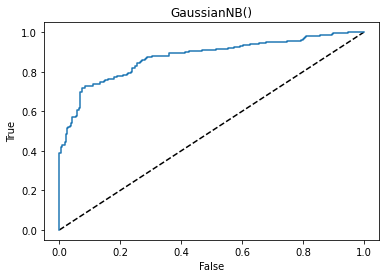

In [140]:
#INPUTS: log, nv, support, knear , dec_tree
#predict_model(int(input("Enter Model Name ")))
predict_model(nv)

In [128]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(support)

Details for SVC() Model :-
The accuracy score for SVC() is:- 87.16814159292035 

The confusion matrix for SVC() is :- 
 [[209  30]
 [ 28 185]] 

The classification report for SVC() is:- 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       239
           1       0.86      0.87      0.86       213

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452
 



Cross Validation Score for SVC() is:- 
 [0.62913907 0.77740864 0.89368771 0.93023256 0.9269103 ]
Mean of Cross Validation Score for SVC() is:- 
 0.8314756551010978
Standard Deviation of Cross Validation Score for SVC() is:- 
 0.1154074274088065


SVC() Model Score 87.16814159292035
Mean Score After CV
Model Score is 0.040205760828105785


Printing the AUC/RUC curve for the model


AttributeError: predict_proba is not available when  probability=False

Details for SVC(probability=True) Model :-
The accuracy score for SVC(probability=True) is:- 87.16814159292035 

The confusion matrix for SVC(probability=True) is :- 
 [[209  30]
 [ 28 185]] 

The classification report for SVC(probability=True) is:- 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       239
           1       0.86      0.87      0.86       213

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452
 



Cross Validation Score for SVC(probability=True) is:- 
 [0.62913907 0.77740864 0.89368771 0.93023256 0.9269103 ]
Mean of Cross Validation Score for SVC(probability=True) is:- 
 0.8314756551010978
Standard Deviation of Cross Validation Score for SVC(probability=True) is:- 
 0.1154074274088065


SVC(probability=True) Model Score 87.16814159292035
Mean Score After CV
Model Score is 0.040205760828105785


Printing the

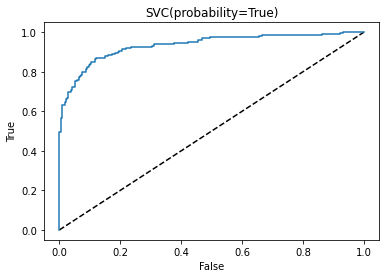

In [141]:
suport = SVC(probability=True)
predict_model(suport)

Details for KNeighborsClassifier() Model :-
The accuracy score for KNeighborsClassifier() is:- 64.15929203539822 

The confusion matrix for KNeighborsClassifier() is :- 
 [[ 84 155]
 [  7 206]] 

The classification report for KNeighborsClassifier() is:- 
               precision    recall  f1-score   support

           0       0.92      0.35      0.51       239
           1       0.57      0.97      0.72       213

    accuracy                           0.64       452
   macro avg       0.75      0.66      0.61       452
weighted avg       0.76      0.64      0.61       452
 



Cross Validation Score for KNeighborsClassifier() is:- 
 [0.64900662 0.66777409 0.67774086 0.74418605 0.68438538]
Mean of Cross Validation Score for KNeighborsClassifier() is:- 
 0.6846186002508196
Standard Deviation of Cross Validation Score for KNeighborsClassifier() is:- 
 0.03208609951163253


KNeighborsClassifier() Model Score 64.15929203539822
Mean Score After CV
Model Score is -0.043025679896837254


Pr

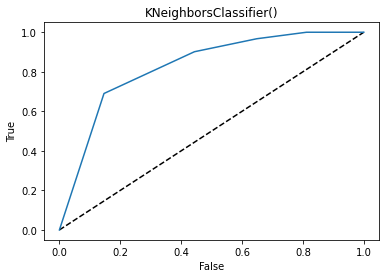

In [142]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(knear)

Details for DecisionTreeClassifier() Model :-
The accuracy score for DecisionTreeClassifier() is:- 80.53097345132744 

The confusion matrix for DecisionTreeClassifier() is :- 
 [[181  58]
 [ 30 183]] 

The classification report for DecisionTreeClassifier() is:- 
               precision    recall  f1-score   support

           0       0.86      0.76      0.80       239
           1       0.76      0.86      0.81       213

    accuracy                           0.81       452
   macro avg       0.81      0.81      0.81       452
weighted avg       0.81      0.81      0.81       452
 



Cross Validation Score for DecisionTreeClassifier() is:- 
 [0.71854305 0.75747508 0.83056478 0.87043189 0.84053156]
Mean of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.8035092737233505
Standard Deviation of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.056426401612379544


DecisionTreeClassifier() Model Score 80.53097345132744
Mean Score After CV
Model Score is 0.0018004

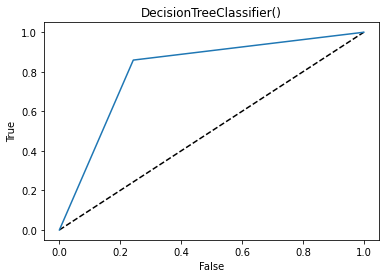

In [143]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(dec_tree)

Checking results after dropping the columns

In [144]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


In [145]:
col

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
data = data.drop("months_as_customer",axis = 1)
data = data.drop("age",axis = 1)
data = data.drop("insured_zip",axis = 1)
data = data.drop("incident_type",axis = 1)
data = data.drop("auto_year",axis = 1)

In [157]:
print(fraud.shape)
print(data.shape)

(1000, 40)
(1000, 34)


<function matplotlib.pyplot.show(close=None, block=None)>

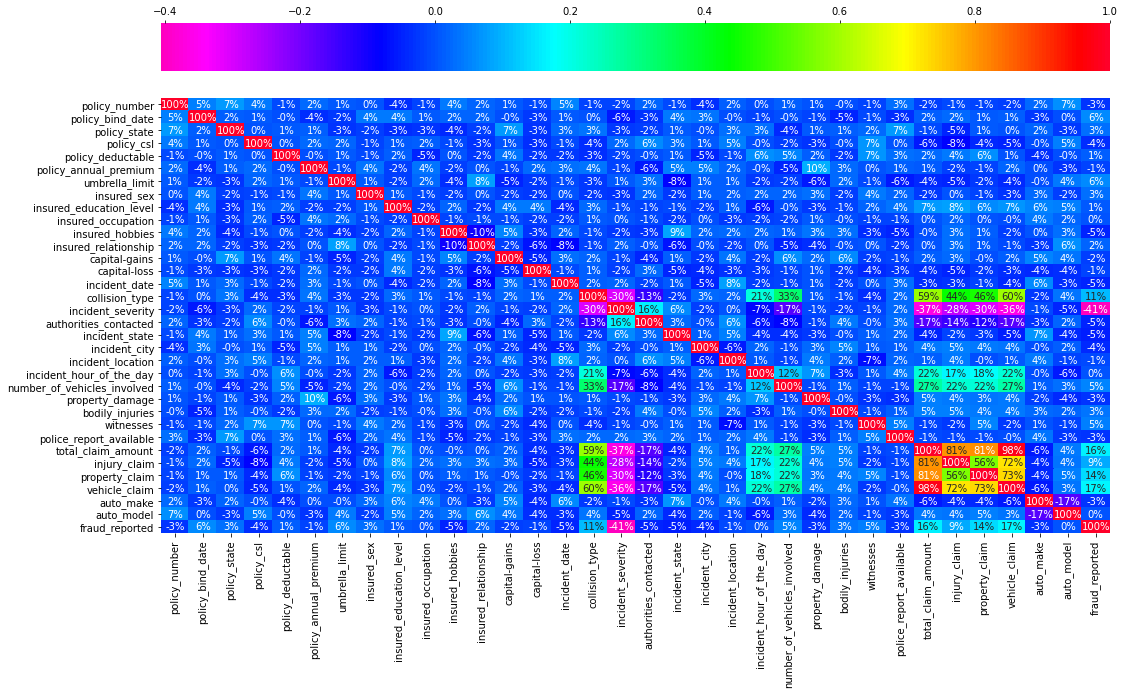

In [221]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

In [224]:
data.columns

Index(['policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [225]:
data = data.drop('incident_hour_of_the_day',axis=1)
data = data.drop('number_of_vehicles_involved',axis=1)

We dropped 2 more columns as per the heatmap they are highly corelated with total claim amount, injury claim,property claim, vehicle claim and less with the target variable

In [236]:
a = data.iloc[:,0:33]
a

,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,521585,532,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,342868,821,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,687698,186,2,0,2000,1413.14,5000000,0,6,11,...,2,3,1,34650,7700,3850,23100,4,30,0
3,227811,766,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,63400,6340,6340,50720,3,34,1
4,367455,181,0,2,1000,1583.91,6000000,1,0,11,...,0,1,1,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851,487,2,2,1000,1310.80,0,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,0
996,186934,129,0,0,1000,1436.79,0,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,0
997,918516,509,2,1,500,1383.49,3000000,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,0
998,533940,573,0,2,2000,1356.92,5000000,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,0


In [237]:
b = data['fraud_reported']
b.shape

(1000,)

We have splitted the data. A contains all the independant variables. B contains the target variable.

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a = sc.fit_transform(a)

Data is imbalanced so we used scaler to scale the data and bring the data in same class. 

In [229]:
from sklearn.preprocessing import power_transform
a = power_transform(a,method='yeo-johnson')

We checked that our data is having skewness, removing the same using Yeo Johnson method under power transformation. This library is called from the sklearn preprocessing

In [230]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
a,b = smote.fit_resample(a,b)

We have imbalanced classes so we balanced the data using SMOTE Synthetic Minority Oversampling Technique. 

In [231]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.30,random_state=45)

We have now separated the data into training and testing. We are fetching 70% data for traini8ng and 30% for testing. 

In [232]:
loga = LogisticRegression()
nva = GaussianNB()
supporta = SVC()
kneara = KNeighborsClassifier()
dec_treea = DecisionTreeClassifier()

We created new variables for classification algorithms

In [249]:
def predict_model_new(X):
    X.fit(a_train,b_train)
    prediction = X.predict(a_test)
    print("Details for",X,"Model :-")
    print("The accuracy score for",X,"is:-",accuracy_score(y_test,prediction)*100,'\n')
    cm = confusion_matrix(b_test,prediction)
    print("The confusion matrix for",X,"is :- \n",cm,'\n')    
    print("The classification report for",X,"is:- \n",classification_report(y_test,prediction),'\n')
    
    from sklearn.model_selection import cross_val_score
    cv_score = cross_val_score(X,a,b,cv=5)
    print('\n')
    print("Cross Validation Score for",X,"is:- \n",cv_score)
    print("Mean of Cross Validation Score for",X,"is:- \n",cv_score.mean())
    print("Standard Deviation of Cross Validation Score for",X,"is:- \n",cv_score.std())
    print('\n')
    
    print(X,'Model Score',accuracy_score(b_test,prediction)*100)
    print('Mean Score After CV',)
    print("Model Score is", accuracy_score(b_test,prediction)-cv_score.mean())
    print('\n')
    
    print("Printing the AUC/RUC curve for the model")
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    c_predict_prob = X.predict_proba(a_test)[:,1]
    fpr,tpr,threshold = roc_curve(b_test,c_predict_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=X)
    plt.xlabel('False')
    plt.ylabel('True')
    plt.title(X)
    plt.show()
    
    auc_score = roc_auc_score(b_test,prediction)
    print("AUC Score for",X,"model is:",auc_score)

We created a new function that will fit the data, predict the data and gives us teh accuracy score, classification matrix, CV score, AUC and RUC curve. 

Details for LogisticRegression() Model :-
The accuracy score for LogisticRegression() is:- 100.0 

The confusion matrix for LogisticRegression() is :- 
 [[239   0]
 [  0 213]] 

The classification report for LogisticRegression() is:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       213

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452
 



Cross Validation Score for LogisticRegression() is:- 
 [0.755 0.75  0.715 0.76  0.755]
Mean of Cross Validation Score for LogisticRegression() is:- 
 0.7469999999999999
Standard Deviation of Cross Validation Score for LogisticRegression() is:- 
 0.016309506430300106


LogisticRegression() Model Score 100.0
Mean Score After CV
Model Score is 0.2530000000000001


Printing the AUC/RUC curve for the model


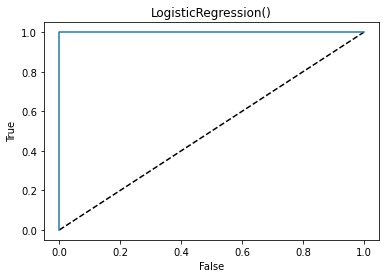

AUC Score for LogisticRegression() model is: 1.0


In [250]:
#loga, nva, supporta, kneara, dec_treea
predict_model_new(loga)

Details for GaussianNB() Model :-
The accuracy score for GaussianNB() is:- 100.0 

The confusion matrix for GaussianNB() is :- 
 [[239   0]
 [  0 213]] 

The classification report for GaussianNB() is:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       213

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452
 



Cross Validation Score for GaussianNB() is:- 
 [0.71  0.685 0.545 0.745 0.69 ]
Mean of Cross Validation Score for GaussianNB() is:- 
 0.675
Standard Deviation of Cross Validation Score for GaussianNB() is:- 
 0.06833739825307954


GaussianNB() Model Score 100.0
Mean Score After CV
Model Score is 0.32499999999999996


Printing the AUC/RUC curve for the model


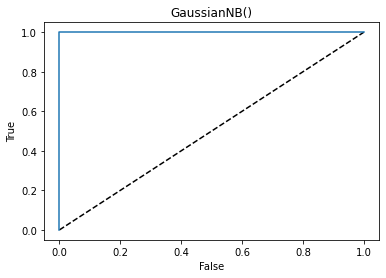

AUC Score for GaussianNB() model is: 1.0


In [251]:
#loga, nva, supporta, kneara, dec_treea
predict_model_new(nva)

In [252]:
#loga, nva, supporta, kneara, dec_treea
predict_model_new(supporta)

Details for SVC() Model :-
The accuracy score for SVC() is:- 100.0 

The confusion matrix for SVC() is :- 
 [[239   0]
 [  0 213]] 

The classification report for SVC() is:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       213

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452
 



Cross Validation Score for SVC() is:- 
 [0.75  0.75  0.755 0.755 0.755]
Mean of Cross Validation Score for SVC() is:- 
 0.7529999999999999
Standard Deviation of Cross Validation Score for SVC() is:- 
 0.00244948974278318


SVC() Model Score 100.0
Mean Score After CV
Model Score is 0.2470000000000001


Printing the AUC/RUC curve for the model


AttributeError: predict_proba is not available when  probability=False

Details for SVC(probability=True) Model :-
The accuracy score for SVC(probability=True) is:- 100.0 

The confusion matrix for SVC(probability=True) is :- 
 [[239   0]
 [  0 213]] 

The classification report for SVC(probability=True) is:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       213

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452
 



Cross Validation Score for SVC(probability=True) is:- 
 [0.75  0.75  0.755 0.755 0.755]
Mean of Cross Validation Score for SVC(probability=True) is:- 
 0.7529999999999999
Standard Deviation of Cross Validation Score for SVC(probability=True) is:- 
 0.00244948974278318


SVC(probability=True) Model Score 100.0
Mean Score After CV
Model Score is 0.2470000000000001


Printing the AUC/RUC curve for the model


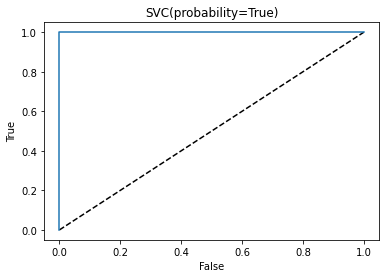

AUC Score for SVC(probability=True) model is: 1.0


In [253]:
#loga, nva, supporta, kneara, dec_treea
svm = SVC(probability=True)
predict_model_new(svm)

Details for KNeighborsClassifier() Model :-
The accuracy score for KNeighborsClassifier() is:- 90.48672566371681 

The confusion matrix for KNeighborsClassifier() is :- 
 [[198  41]
 [  2 211]] 

The classification report for KNeighborsClassifier() is:- 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       239
           1       0.84      0.99      0.91       213

    accuracy                           0.90       452
   macro avg       0.91      0.91      0.90       452
weighted avg       0.92      0.90      0.90       452
 



Cross Validation Score for KNeighborsClassifier() is:- 
 [0.68  0.7   0.675 0.74  0.695]
Mean of Cross Validation Score for KNeighborsClassifier() is:- 
 0.698
Standard Deviation of Cross Validation Score for KNeighborsClassifier() is:- 
 0.022934689882359412


KNeighborsClassifier() Model Score 90.48672566371681
Mean Score After CV
Model Score is 0.2068672566371682


Printing the AUC/RUC curve for the model


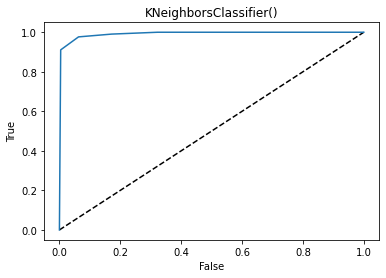

AUC Score for KNeighborsClassifier() model is: 0.909531105741843


In [254]:
#loga, nva, supporta, kneara, dec_treea
predict_model_new(kneara)

Details for DecisionTreeClassifier() Model :-
The accuracy score for DecisionTreeClassifier() is:- 100.0 

The confusion matrix for DecisionTreeClassifier() is :- 
 [[239   0]
 [  0 213]] 

The classification report for DecisionTreeClassifier() is:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       213

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452
 



Cross Validation Score for DecisionTreeClassifier() is:- 
 [1. 1. 1. 1. 1.]
Mean of Cross Validation Score for DecisionTreeClassifier() is:- 
 1.0
Standard Deviation of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.0


DecisionTreeClassifier() Model Score 100.0
Mean Score After CV
Model Score is 0.0


Printing the AUC/RUC curve for the model


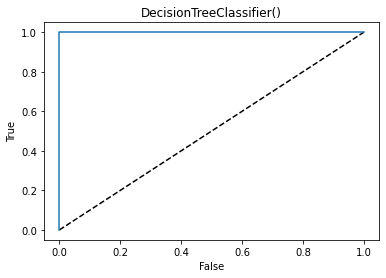

AUC Score for DecisionTreeClassifier() model is: 1.0


In [255]:
#loga, nva, supporta, kneara, dec_treea
predict_model_new(dec_treea)

We can now check that our model is giving 100% accuracy for our predictions. We can check that model score which is accuracy score - CV score is minimum for Decision tree. Hence, we can say that decision tree is best suited for this dataset. 

In [256]:
from sklearn.model_selection import GridSearchCV

parameter = [{'n_neighbors':[5,10,15,20] , 'weights' : ['uniform'], 'algorithm' : ['auto']},
            {'n_neighbors':[10,20,30,40] , 'weights' : ['distance'], 'algorithm' : ['ball_tree'], 'leaf_size':[40]},
            {'n_neighbors':[2,4,6,8,10] , 'weights' : ['uniform'], 'algorithm' : ['kd_tree']},
            {'n_neighbors':[10,20,30,40],'weights':['distance'],'algorithm':['ball_tree'],'leaf_size':[40],'p':[2],'metric':['minkowski'],'n_jobs':[-1]}]

grid_search = GridSearchCV ( estimator = kneara,
                            param_grid = parameter,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit(a_train,b_train)

In [257]:
accuracy = grid_search.best_score_
accuracy

0.9621024258760109

In [258]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 4, 'weights': 'uniform'}

We used grid search CV to enhance the working of K Near NEighbours and we can check that after grid search we are able to improve the score by 6%. Now the new score is 96%. Odl score was 90%. Accuracy showing the accuracy score usig grid search and best parameters shows the best parameters to use to improve the score. 

Conclusion:
    We have finally acheived our target. We can say that decision tree is working best as this has low difference in CV and accuracy score. Hence we can save this model for production. 

In [268]:
import pickle
filename = 'fraud_Claim_detection.pkl'
pickle.dump(dec_treea, open(filename, 'wb'))

Impoering pickle library to save the model. Model saved. 